# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 600


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
weather_api_key = "4d900084c55d92000856b123b12e2d75"

url = f"http://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units=imperial"


# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url =  url + "&q=" + city
    
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather =requests.get(city_url).json()
        

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp =city_weather["main"]["temp_max"]
        city_humidity =city_weather["main"]["humidity"]
        city_clouds =city_weather["clouds"]["all"]
        city_wind =city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date =city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | dadonghai
City not found. Skipping...
Processing Record 2 of Set 1 | hotan
Processing Record 3 of Set 1 | ust-nera
Processing Record 4 of Set 1 | iqaluit
Processing Record 5 of Set 1 | le mee-sur-seine
Processing Record 6 of Set 1 | longyearbyen
Processing Record 7 of Set 1 | waitangi
Processing Record 8 of Set 1 | yellowknife
Processing Record 9 of Set 1 | adamstown
Processing Record 10 of Set 1 | wailua homesteads
Processing Record 11 of Set 1 | avarua
Processing Record 12 of Set 1 | ciudad constitucion
Processing Record 13 of Set 1 | edinburgh of the seven seas
Processing Record 14 of Set 1 | cargados carajos
City not found. Skipping...
Processing Record 15 of Set 1 | tehri
Processing Record 16 of Set 1 | lihue
Processing Record 17 of Set 1 | grytviken
Processing Record 18 of Set 1 | san antonio de pale
Processing Record 19 of Set 1 | santa cruz
Processing Record 20 of Set 1 | contai
Processin

Processing Record 41 of Set 4 | skelleftea
Processing Record 42 of Set 4 | tsiombe
Processing Record 43 of Set 4 | banamba
Processing Record 44 of Set 4 | puerto ayora
Processing Record 45 of Set 4 | waingapu
Processing Record 46 of Set 4 | kodiak
Processing Record 47 of Set 4 | mto wa mbu
Processing Record 48 of Set 4 | sinabang
Processing Record 49 of Set 4 | carinhanha
Processing Record 0 of Set 5 | qaqortoq
Processing Record 1 of Set 5 | kem'
Processing Record 2 of Set 5 | nenjiang
Processing Record 3 of Set 5 | petropavlovsk-kamchatsky
Processing Record 4 of Set 5 | tulle
Processing Record 5 of Set 5 | mirabad
Processing Record 6 of Set 5 | san jose de feliciano
Processing Record 7 of Set 5 | hammerfest
Processing Record 8 of Set 5 | nuuk
Processing Record 9 of Set 5 | san patricio
Processing Record 10 of Set 5 | cururupu
Processing Record 11 of Set 5 | constantia
Processing Record 12 of Set 5 | bryne
Processing Record 13 of Set 5 | shimoda
Processing Record 14 of Set 5 | papatowa

Processing Record 32 of Set 8 | nikolayevsk-on-amure
Processing Record 33 of Set 8 | hanceville
Processing Record 34 of Set 8 | clinton
Processing Record 35 of Set 8 | lalibela
Processing Record 36 of Set 8 | callao
Processing Record 37 of Set 8 | alotau
City not found. Skipping...
Processing Record 38 of Set 8 | beyneu
Processing Record 39 of Set 8 | marsa alam
Processing Record 40 of Set 8 | mar del plata
Processing Record 41 of Set 8 | jinghong
Processing Record 42 of Set 8 | monteria
Processing Record 43 of Set 8 | sitia
Processing Record 44 of Set 8 | petawawa
Processing Record 45 of Set 8 | lianjiang
Processing Record 46 of Set 8 | queenstown
Processing Record 47 of Set 8 | petoskey
Processing Record 48 of Set 8 | borogontsy
Processing Record 49 of Set 8 | lerwick
Processing Record 0 of Set 9 | altai
Processing Record 1 of Set 9 | nyala
Processing Record 2 of Set 9 | klaksvik
Processing Record 3 of Set 9 | usogorsk
Processing Record 4 of Set 9 | siguiri
Processing Record 5 of Set

Processing Record 23 of Set 12 | greenville
Processing Record 24 of Set 12 | hohhot
Processing Record 25 of Set 12 | suva
Processing Record 26 of Set 12 | abepura
Processing Record 27 of Set 12 | labrador city
Processing Record 28 of Set 12 | mukah
City not found. Skipping...
Processing Record 29 of Set 12 | esil
Processing Record 30 of Set 12 | saint-joseph
Processing Record 31 of Set 12 | ialibu
Processing Record 32 of Set 12 | ergli
Processing Record 33 of Set 12 | sattahip
Processing Record 34 of Set 12 | san antonio del estrecho
City not found. Skipping...
Processing Record 35 of Set 12 | yamada
Processing Record 36 of Set 12 | chardara
Processing Record 37 of Set 12 | kharp
Processing Record 38 of Set 12 | dickinson
Processing Record 39 of Set 12 | cadale
Processing Record 40 of Set 12 | baukau
Processing Record 41 of Set 12 | ponta delgada
Processing Record 42 of Set 12 | lata
Processing Record 43 of Set 12 | hwange
Processing Record 44 of Set 12 | shahin dezh
Processing Record 

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          573
Lat           573
Lng           573
Max Temp      573
Humidity      573
Cloudiness    573
Wind Speed    573
Country       573
Date          573
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,hotan,37.0997,79.9269,64.54,41,100,18.05,CN,1695257172
1,ust-nera,64.5667,143.2000,31.66,79,100,9.95,RU,1695257172
2,iqaluit,63.7506,-68.5145,29.93,100,100,2.30,CA,1695257046
3,le mee-sur-seine,48.5316,2.6283,68.18,78,75,14.97,FR,1695257172
4,longyearbyen,78.2186,15.6401,28.24,80,20,2.30,SJ,1695257095


In [8]:
# Export the City_Data into a csv
city_data_df.to_csv("C:\\Users\\arond\\Desktop\\MSU Bootcamp\\Class_Work\\Module6\\Challenge\\python-api-challenge\\WeatherPy\\cities.csv", index_label="City_ID")

In [9]:
# Read saved data
city_data_df = pd.read_csv("C:\\Users\\arond\\Desktop\\MSU Bootcamp\\Class_Work\\Module6\\Challenge\\python-api-challenge\\WeatherPy\\cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,hotan,37.0997,79.9269,64.54,41,100,18.05,CN,1695257172
1,ust-nera,64.5667,143.2000,31.66,79,100,9.95,RU,1695257172
2,iqaluit,63.7506,-68.5145,29.93,100,100,2.30,CA,1695257046
3,le mee-sur-seine,48.5316,2.6283,68.18,78,75,14.97,FR,1695257172
4,longyearbyen,78.2186,15.6401,28.24,80,20,2.30,SJ,1695257095


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

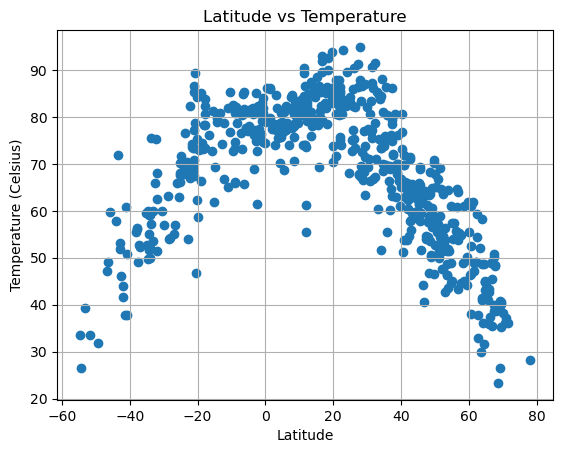

In [11]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker="o")

# Incorporate the other graph properties
plt.title("Latitude vs Temperature")
plt.ylabel("Temperature (Celsius)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("C:\\Users\\arond\\Desktop\\MSU Bootcamp\\Class_Work\\Module6\\Challenge\\python-api-challenge\\WeatherPy\\Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

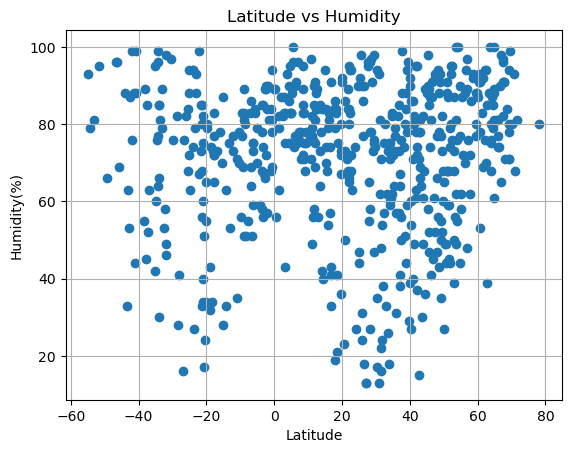

In [12]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker="o")

# Incorporate the other graph properties
plt.title("Latitude vs Humidity")
plt.ylabel("Humidity(%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("C:\\Users\\arond\\Desktop\\MSU Bootcamp\\Class_Work\\Module6\\Challenge\\python-api-challenge\\WeatherPy\\Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

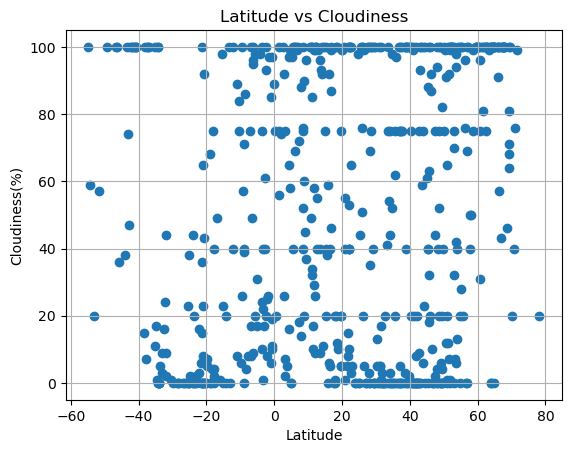

In [13]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker="o")

# Incorporate the other graph properties
plt.title("Latitude vs Cloudiness")
plt.ylabel("Cloudiness(%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("C:\\Users\\arond\\Desktop\\MSU Bootcamp\\Class_Work\\Module6\\Challenge\\python-api-challenge\\WeatherPy\\Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

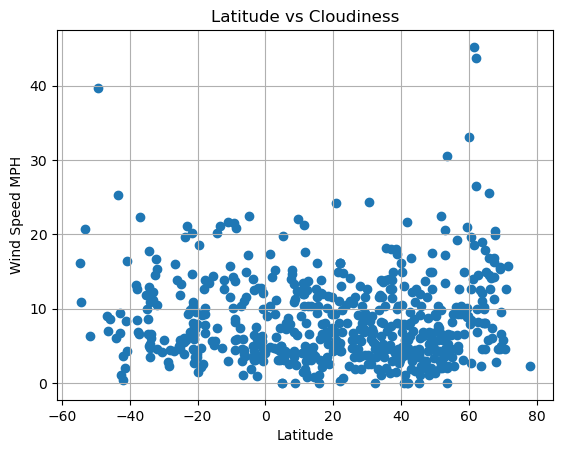

In [14]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker="o")

# Incorporate the other graph properties
plt.title("Latitude vs Cloudiness")
plt.ylabel("Wind Speed MPH")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("C:\\Users\\arond\\Desktop\\MSU Bootcamp\\Class_Work\\Module6\\Challenge\\python-api-challenge\\WeatherPy\\Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [15]:
# Define a function to create Linear Regression plots
def lin_reg(x_values, y_values, x,y):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
    print(f"The r-value is: {rvalue ** 2}")
    plt.scatter(x_values, y_values, marker="o")
    plt.plot(x_values, regress_values, color="red")
    plt.annotate(line_eq,(x,y),color="red",fontsize=15)
    plt.xlabel("Latitude")
    plt.ylabel(y_values.name)
    plt.show()

In [16]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df= city_data_df.loc[(city_data_df.Lat >=0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,hotan,37.0997,79.9269,64.54,41,100,18.05,CN,1695257172
1,ust-nera,64.5667,143.2000,31.66,79,100,9.95,RU,1695257172
2,iqaluit,63.7506,-68.5145,29.93,100,100,2.30,CA,1695257046
3,le mee-sur-seine,48.5316,2.6283,68.18,78,75,14.97,FR,1695257172
4,longyearbyen,78.2186,15.6401,28.24,80,20,2.30,SJ,1695257095


In [17]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df= city_data_df.loc[(city_data_df.Lat < 0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
5,waitangi,-43.9535,-176.5597,57.81,88,38,5.99,NZ,1695257173
7,adamstown,-25.0660,-130.1015,70.18,88,38,11.83,PN,1695257173
9,avarua,-21.2078,-159.7750,73.45,56,100,8.05,CK,1695257143
11,edinburgh of the seven seas,-37.0676,-12.3116,52.32,63,100,22.35,SH,1695257173
14,grytviken,-54.2811,-36.5092,26.51,79,59,10.89,GS,1695257174


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.7111975560538337


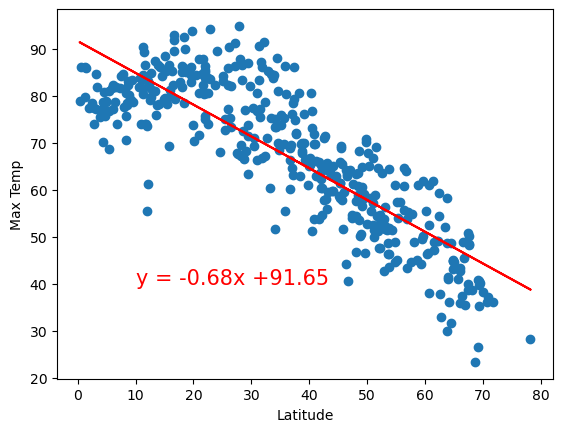

In [18]:
# Linear regression on Northern Hemisphere
x_values=northern_hemi_df["Lat"]
y_values=northern_hemi_df["Max Temp"]
lin_reg(x_values, y_values, 10,40)

The r-value is: 0.6528856374293214


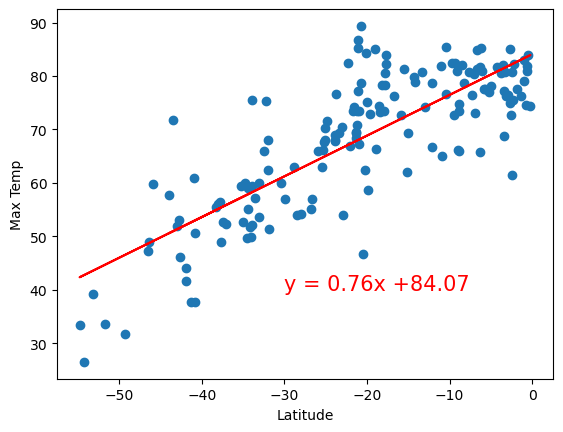

In [19]:
# Linear regression on Southern Hemisphere
x_values=southern_hemi_df["Lat"]
y_values=southern_hemi_df["Max Temp"]
lin_reg(x_values, y_values, -30,40)

**Discussion about the linear relationship:** Temp goes up in the southern hemisphere, while it goes down the farther up in the northern hemiphere you go.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.002593011479225112


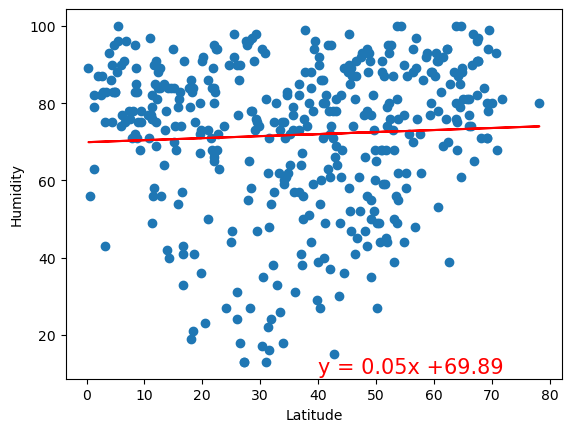

In [20]:
# Northern Hemisphere
x_values=northern_hemi_df["Lat"]
y_values=northern_hemi_df["Humidity"]
lin_reg(x_values, y_values, 40,10)

The r-value is: 0.0009990142390995567


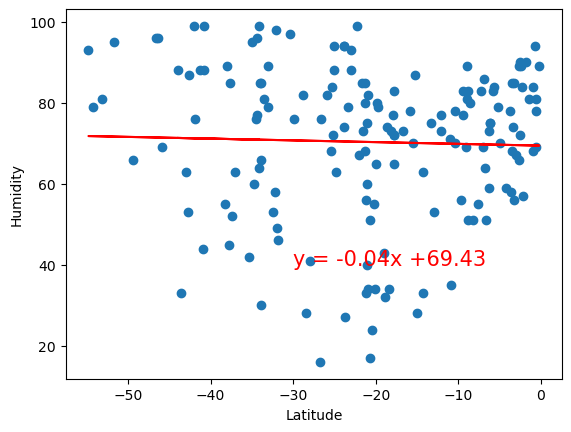

In [21]:
# Southern Hemisphere
x_values=southern_hemi_df["Lat"]
y_values=southern_hemi_df["Humidity"]
lin_reg(x_values, y_values, -30,40)

**Discussion about the linear relationship:** Slighty association, but not much.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.013332898850017686


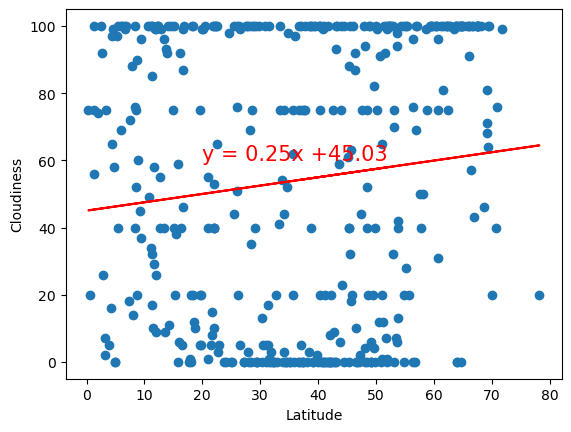

In [22]:
# Northern Hemisphere
x_values=northern_hemi_df["Lat"]
y_values=northern_hemi_df["Cloudiness"]
lin_reg(x_values, y_values, 20,60)

The r-value is: 0.005512119961012781


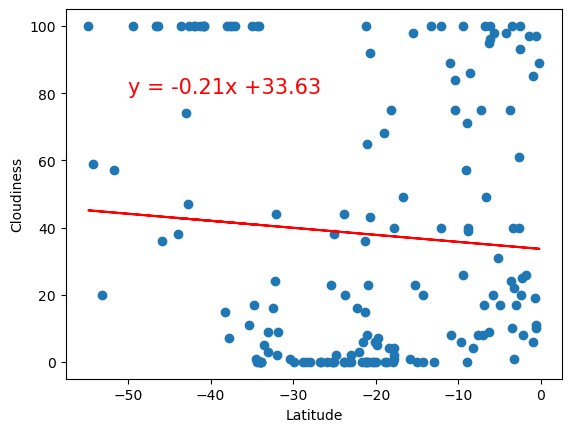

In [23]:
# Southern Hemisphere
x_values=southern_hemi_df["Lat"]
y_values=southern_hemi_df["Cloudiness"]
lin_reg(x_values, y_values, -50,80)

**Discussion about the linear relationship:** Againt he association is slight, but not much to point fingers at the cause.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.022428829636433473


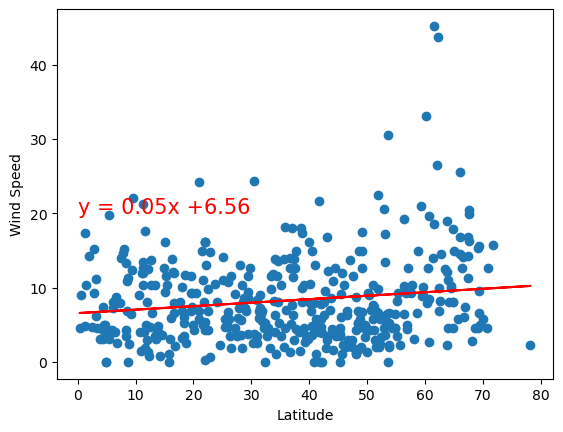

In [24]:
# Northern Hemisphere
x_values=northern_hemi_df["Lat"]
y_values=northern_hemi_df["Wind Speed"]
lin_reg(x_values, y_values, 0,20)

The r-value is: 0.02356907237755659


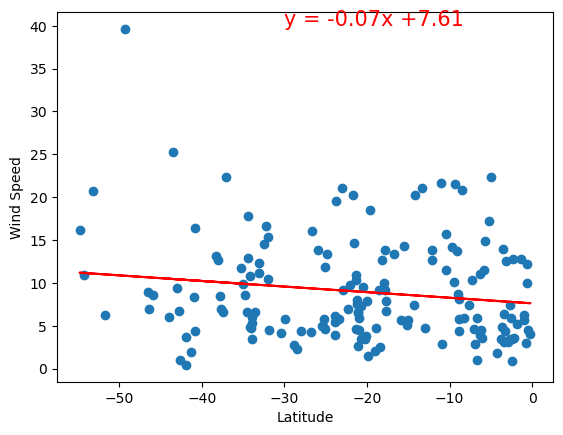

In [25]:
# Southern Hemisphere
x_values=southern_hemi_df["Lat"]
y_values=southern_hemi_df["Wind Speed"]
lin_reg(x_values, y_values, -30,40)

**Discussion about the linear relationship:** Hard to tell, but kinda looks like causation 